<center> 
    <h1>Concepto 1: Parámetros y métricas descriptivas</h3>
    <br>
    <strong>Nombre</strong> Julian Camilo Restrepo 
    <br>
    <strong>Código</strong> 1113689843
     <br>
    <strong>Fecha</strong> 09 de junio del 2024
</center>

# **Presentación del ejercicio**

#### Concepto 1: Parámetros y métricas descriptivas

Desarrollo de códigos y celdas Markdown para desarrollar las siguientes tareas:

1. Muestre las métricas descriptivas para todas las columnas de su base de datos
según el tipo de variable como sigue:

Variables numéricas: Cantidad de datos, media, desviación estándar,
mínimo, máximo y percentiles 25, 50 y 75.

Variables categóricas: Cantidad, cantidad de valores únicos, moda y
frecuencia de la moda.

   • Muestre la matriz de correlación de las variables numéricas e identifique las
variables que más se correlacionan (visualizarla, ver concepto 3).

   • Realice un análisis de los resultados obtenidos.

# **Revisión Teórica**


#### **¿Que es la estadistica descriptiva?**

La estadística descriptiva es la rama de la estadística que se encarga de describir los datos recopilados para ayudar a analizarlos. Es decir, la estadística descriptiva sirve para resumir un conjunto de datos mediante medidas estadísticas, gráficos o tablas.

Por ejemplo, podemos usar la estadística descriptiva para presentar las frecuencias de una muestra de datos en un gráfico de barras, asimismo, podemos calcular la media aritmética, la desviación típica y otras medidas descriptivas para determinar cómo es la muestra de datos del estudio estadístico.


#### **Medidas estadisticas descriptivas**

Las medidas estadísticas descriptivas son parámetros estadísticos que sirven para describir un conjunto de datos. Es decir, las medidas descriptivas son cálculos que se hacen sobre una muestra de datos para resumir dichos datos.

#### **Correlación y causalidad**

Correlación: una medida del grado de interdependencia entre variables.

Causalidad: la relación entre causa y efecto entre dos variables.

Es importante saber la diferencia entre estos dos y que la correlación no implica causalidad. Determinar la correlación es mucho más simple que la causalidad determinante ya que la causalidad puede requerir experimentación independiente.

#### **Correlación de Pearson**

La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

1: correlación lineal positiva total.
0: Sin correlación lineal, las dos variables probablemente no se afectan entre sí.
-1: correlación lineal negativa total.
Correlación de Pearson es el método predeterminado de la función "corr". Como antes, podemos calcular la correlación de Pearson de las variables 'int64' o 'float64'.

#### **Valor p:**

¿Qué es este valor P? El valor P es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que estamos 95% seguros de que la correlación entre las variables es significativa.

Por convención, cuando el

El valor p es <0.001: decimos que hay pruebas sólidas de que la correlación es significativa.
el valor p es <0.05: existe evidencia moderada de que la correlación es significativa.
el valor p es <0.1: existe evidencia débil de que la correlación es significativa.
el valor p es> 0.1: no hay evidencia de que la correlación sea significativa.
Podemos obtener esta información usando el módulo "stats" en la biblioteca "scipy".

Análisis Estadístico Descriptivo Con Python / Anova, Pearson Y Mapas De Calor |. (2019, noviembre 4). Rubén J. Romo; Rubén. https://rubenjromo.com/analisis-estadistico-descriptivo-con-python/


# **Desarrollo**

In [27]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [12]:
# Paso 1: Obtener los datos de la API en formato JSON
url = "https://www.datos.gov.co/resource/2pnw-mmge.json"
response = requests.get(url)
data = pd.json_normalize(response.json())

# Mostrar las primeras filas del DataFrame
print(data.head())

  c_d_dep        departamento c_d_mun   municipio grupo_de_cultivo  \
0      15              BOYACA   15114    BUSBANZA       HORTALIZAS   
1      25        CUNDINAMARCA   25754      SOACHA       HORTALIZAS   
2      25        CUNDINAMARCA   25214        COTA       HORTALIZAS   
3      54  NORTE DE SANTANDER   54405  LOS PATIOS       HORTALIZAS   
4      54  NORTE DE SANTANDER   54518    PAMPLONA       HORTALIZAS   

  subgrupo_de_cultivo cultivo desagregaci_n_regional_y   a_o periodo  \
0              ACELGA  ACELGA                   ACELGA  2006   2006B   
1              ACELGA  ACELGA                   ACELGA  2006   2006B   
2              ACELGA  ACELGA                   ACELGA  2006   2006B   
3              ACELGA  ACELGA                   ACELGA  2006   2006B   
4              ACELGA  ACELGA                   ACELGA  2006   2006B   

  rea_sembrada_ha rea_cosechada_ha producci_n_t rendimiento_t_ha  \
0               2                1            1             1.00   
1         

In [13]:
# Paso 2: Explorar los datos
print(f"Total de registros: {len(data)}")
print(data.info())
print(data.describe())

Total de registros: 1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   c_d_dep                   1000 non-null   object
 1   departamento              1000 non-null   object
 2   c_d_mun                   1000 non-null   object
 3   municipio                 999 non-null    object
 4   grupo_de_cultivo          1000 non-null   object
 5   subgrupo_de_cultivo       1000 non-null   object
 6   cultivo                   1000 non-null   object
 7   desagregaci_n_regional_y  1000 non-null   object
 8   a_o                       1000 non-null   object
 9   periodo                   1000 non-null   object
 10  rea_sembrada_ha           1000 non-null   object
 11  rea_cosechada_ha          1000 non-null   object
 12  producci_n_t              1000 non-null   object
 13  rendimiento_t_ha          932 non-null    object
 14  

In [15]:
# Paso 3: Limpiar y preparar los datos
# Convertir las columnas numéricas a tipo numérico
numerical_columns = ['c_d_dep', 'rea_sembrada_ha', 'rea_cosechada_ha', 'producci_n_t', 'rendimiento_t_ha', 'c_d_mun']
for column in numerical_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

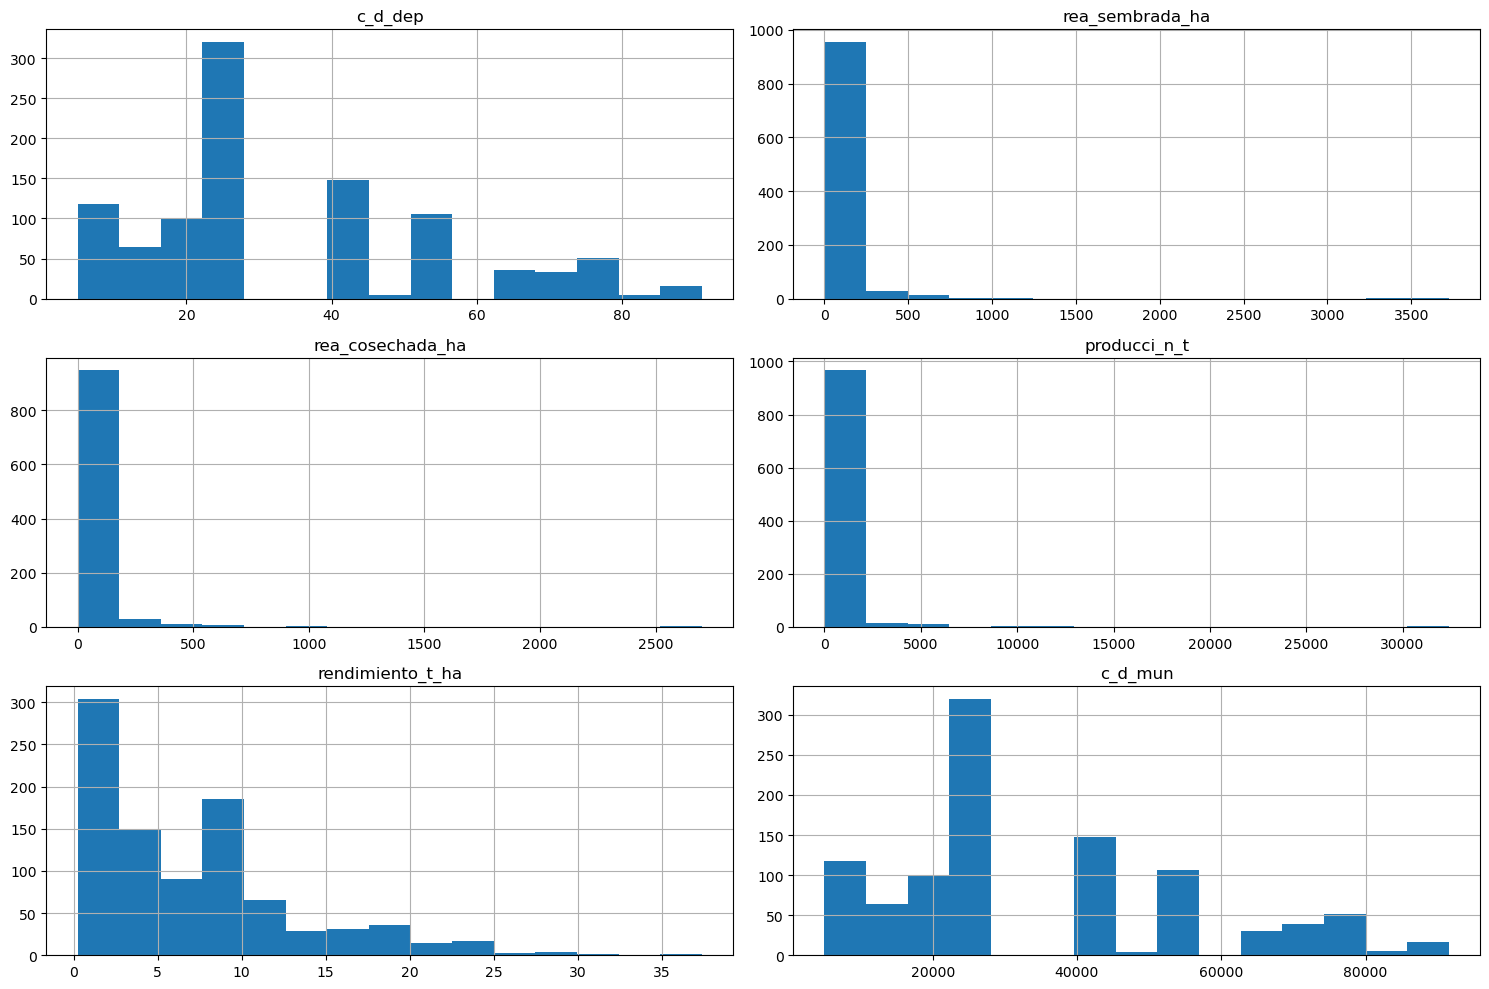

Matriz de correlación:
                   c_d_dep  rea_sembrada_ha  rea_cosechada_ha  producci_n_t  \
c_d_dep           1.000000        -0.009112         -0.006554     -0.038079   
rea_sembrada_ha  -0.009112         1.000000          0.974365      0.945951   
rea_cosechada_ha -0.006554         0.974365          1.000000      0.963792   
producci_n_t     -0.038079         0.945951          0.963792      1.000000   
rendimiento_t_ha -0.131675         0.063109          0.061674      0.147161   
c_d_mun           0.999921        -0.009784         -0.007302     -0.038671   

                  rendimiento_t_ha   c_d_mun  
c_d_dep                  -0.131675  0.999921  
rea_sembrada_ha           0.063109 -0.009784  
rea_cosechada_ha          0.061674 -0.007302  
producci_n_t              0.147161 -0.038671  
rendimiento_t_ha          1.000000 -0.131322  
c_d_mun                  -0.131322  1.000000  


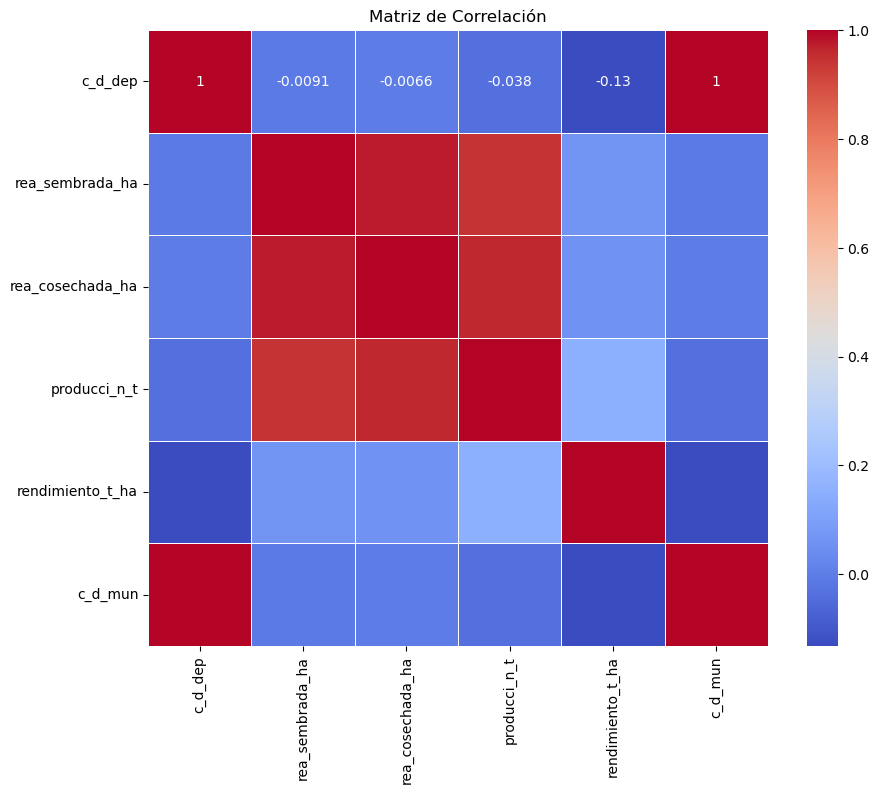

C:\Users\julian.restrepo\AppData\Local\Temp\ipykernel_10616\155198820.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='producci_n_t', y='departamento', data=data, ci=None, palette='viridis')


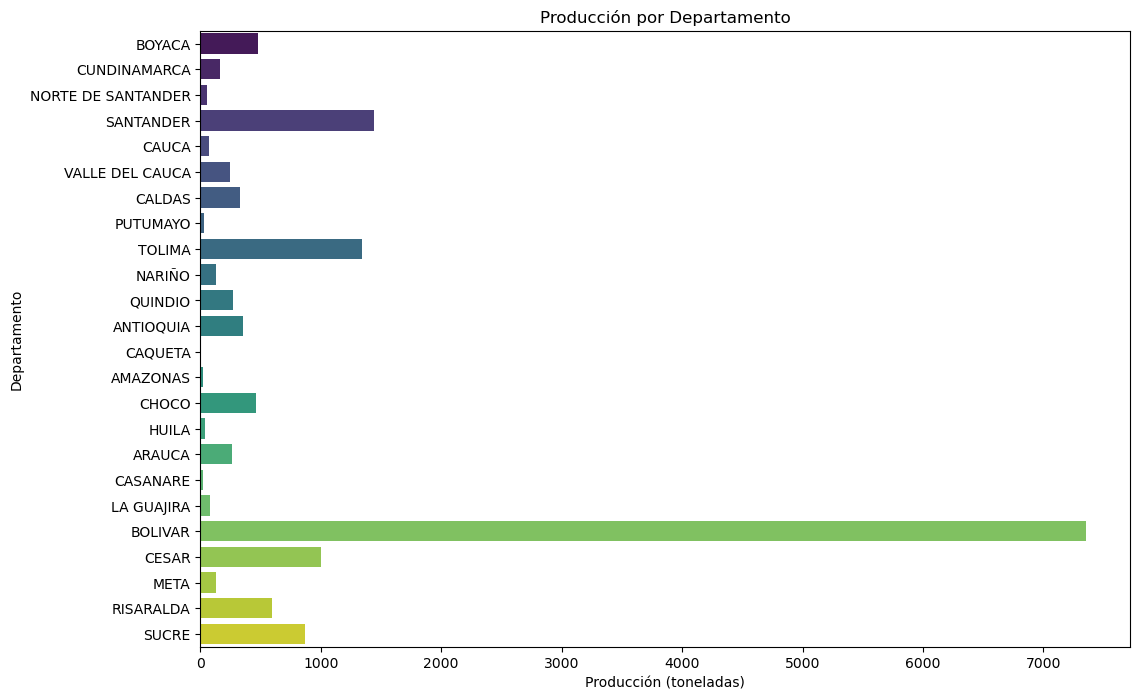

In [16]:
# Paso 4: Análisis y visualización de datos
# Visualización de la distribución de los datos numéricos
data[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.tight_layout()
plt.show()

# Análisis de correlación
correlation_matrix = data[numerical_columns].corr()
print("Matriz de correlación:")
print(correlation_matrix)

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Visualización de la producción por departamento
plt.figure(figsize=(12, 8))
sns.barplot(x='producci_n_t', y='departamento', data=data, ci=None, palette='viridis')
plt.title('Producción por Departamento')
plt.xlabel('Producción (toneladas)')
plt.ylabel('Departamento')
plt.show()


In [17]:
# Paso 5: Guardar el DataFrame limpio a un archivo CSV
data.to_csv('datos_agricolas_limpios.csv', index=False)

# **Analisis de resultados**

# **Matriz de correlación**


#### **1. Correlación Alta entre "rea_sembrada_ha", "rea_cosechada_ha", "producci_n_t"**

* Las variables "rea_sembrada_ha" y "rea_cosechada_ha" tienen una correlación de 0.974365 lo cual es bastante alta. Esto sugiere que a medida que aumenta el area sembrada, tambien lo hace el area cosechada. 

* Las variables "rea_sembrada_ha" y "producci_n_t" muestran una correlación de 0.945951, indicando que un aumento en el área sembrada está asociado con un aumento en la producción.

* Las variables "rea_cosechada_ha" y "producci_n_t" tienen una correlación de 0.963792, lo que sugiere que un mayor área cosechada está fuertemente asociado con una mayor producción.

#### **2. Correlación Baja con "rendimiento_t_ha":**

* "rendimiento_t_ha" tiene una baja correlación con la mayoría de las otras variables, excepto con producci_n_t, donde muestra una correlación positiva de 0.147161. Esto podría indicar que el rendimiento por hectárea no está directamente relacionado con el área sembrada o cosechada, pero puede tener un impacto leve en la producción total.

#### **3. Correlación entre "c_d_dep", "c_d_mun":**

* Las variables "c_d_dep" y "c_d_mun" están casi perfectamente correlacionados (0.999921). Esto se debe a que estos campos probablemente representan identificadores únicos de departamentos y municipios, y su relación es meramente un reflejo de la estructura administrativa.

# **Producción por Departamento:**

#### **Producción por Departamento:**


La gráfica de "Producción por Departamento" revela diferencias significativas en la producción agrícola entre los departamentos:


#### **Bolívar como Líder en Producción:**


El departamento de Bolívar destaca con una producción superior a 7000 toneladas, lo que lo coloca como el líder indiscutible en términos de producción agrícola.
Departamentos con Producción Baja:

La mayoría de los demás departamentos tienen producciones que oscilan entre 0 y 1500 toneladas. Esto sugiere una distribución desigual de la producción agrícola en el país, con Bolívar siendo un caso atípico de alta producción.

Esto puede ocasionarse por las diversidad de cultivos que se logran identificar dentro de la variable "grupo de cultivo" los cuales son Frutales, cereales, tuberculos y platanos entre otros: 

In [23]:
# Mostrar los valores únicos en la columna 'departamento'
print(data['departamento'].unique())

# Eliminar espacios adicionales en los valores de la columna 'departamento'
data['departamento'] = data['departamento'].str.strip()

# Filtrar los datos para el departamento de Bolívar
bolivar_data = data[data['departamento'].str.lower() == 'bolivar'.lower()]

# Seleccionar las columnas relevantes
selected_columns = bolivar_data[['grupo_de_cultivo', 'subgrupo_de_cultivo', 'producci_n_t', 'rendimiento_t_ha']]

# Mostrar el DataFrame resultante
print(selected_columns)

# Para una visualización más clara, también podemos mostrar los primeros registros
print(selected_columns.head())



['BOYACA' 'CUNDINAMARCA' 'NORTE DE SANTANDER' 'SANTANDER' 'CAUCA'
 'VALLE DEL CAUCA' 'CALDAS' 'PUTUMAYO' 'TOLIMA' 'NARIÑO' 'QUINDIO'
 'ANTIOQUIA' 'CAQUETA' 'AMAZONAS' 'CHOCO' 'HUILA' 'ARAUCA' 'CASANARE'
 'LA GUAJIRA' 'BOLIVAR' 'CESAR' 'META' 'RISARALDA' 'SUCRE']
    grupo_de_cultivo subgrupo_de_cultivo  producci_n_t  rendimiento_t_ha
740         FRUTALES            AGUACATE         31200              12.0
741         FRUTALES            AGUACATE         10800              18.0
742         FRUTALES            AGUACATE           800              10.0
743         FRUTALES            AGUACATE           180              10.0
744         FRUTALES            AGUACATE           100              10.0
985         FRUTALES            AGUACATE         32400              12.0
986         FRUTALES            AGUACATE         10800              18.0
987         FRUTALES            AGUACATE           720               9.0
988         FRUTALES            AGUACATE           900              15.0
989    

In [24]:
# Paso 1: Limpiar los datos eliminando cualquier espacio adicional en la columna 'departamento'
data['departamento'] = data['departamento'].str.strip()

# Paso 2: Filtrar los datos relevantes para asegurarnos de que no haya valores nulos en las columnas de interés
filtered_data = data.dropna(subset=['departamento', 'rea_cosechada_ha', 'rea_sembrada_ha', 'rendimiento_t_ha'])

# Paso 3: Calcular el rendimiento por hectárea en función de las áreas cosechadas y sembradas
filtered_data['calculated_rendimiento_t_ha'] = filtered_data['producci_n_t'] / filtered_data['rea_cosechada_ha']

# Paso 4: Agrupar por departamento y calcular el rendimiento promedio
grouped_data = filtered_data.groupby('departamento').agg({
    'calculated_rendimiento_t_ha': 'mean'
}).reset_index()

# Paso 5: Encontrar el departamento con el mejor rendimiento
best_rendimiento = grouped_data.sort_values(by='calculated_rendimiento_t_ha', ascending=False).head(1)

# Mostrar el departamento con el mejor rendimiento
print(best_rendimiento)

       departamento  calculated_rendimiento_t_ha
23  VALLE DEL CAUCA                          inf


C:\Users\julian.restrepo\AppData\Local\Temp\ipykernel_10616\715715066.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['calculated_rendimiento_t_ha'] = filtered_data['producci_n_t'] / filtered_data['rea_cosechada_ha']


Los resultados anteriores nos hacen evidenciar que a pesar de que Bolivar tiene mayor producción en toneladas por hectarea tiene poco rendimiento en proporción al area sembrada y area cosechada. En los datos estudiados se destaca el departamento del Valle del Cauca como el de mas rendimiento de toneladas por hectareas, esto se debe a los cultivos de caña de azucar representan una gran parte de las toneladas cosechadas por hectareas, ya que las practicas de la cosecha hace que se puedan ejecutar actividades de recolección masiva tanto manual como mecanizada sin preocuparse por dejar el plantio sino arrancar toda la planta como si se presenta en otros cultivos frutales

# **Presentación del ejercicio**

#### Concepto 2: Escalamiento, estandarización y codificación

* Categorice al menos una variable continúa. Defina consistentemente las
categorías propuestas y explique por qué las propone.
* Estandarice o escale al menos dos variables numéricas que sean diferentes en magnitud o unidades de medición, de modo que pueda comparar y encontra similitudes o diferencias en sus distribuciones (visualmente, ver concepto 3).

# **Escalamiento, estandarización y codificación**


#### **Categorización de la Variable Continua**

Inicialmente vamos a categorizar la variable "rendimiento_t_ha" (rendimiento en toneladas por hectárea) en diferentes categorías. Esta variable continua puede ser dividida en categorías para analizar mejor los datos y hacer comparaciones más claras.

#### **Categorías Propuestas:**


* Bajo: Rendimiento menor a 10 t/ha.
* Medio: Rendimiento entre 10 y 20 t/ha.
* Alto: Rendimiento mayor a 20 t/ha.

#### **Razón para las Categorías:**

Estas categorías se disponen para segmentar los datos en niveles de rendimiento agrícola. Esto nos puede ayudar a identificar patrones y tendencias en los rendimientos de diferentes regiones y tipos de cultivos. La categorización permite análisis comparativos más claros entre áreas con distintos niveles de productividad.


In [31]:
# Categorizar rendimiento_t_ha
data['rendimiento_categoria'] = pd.cut(data['rendimiento_t_ha'], 
                                       bins=[-float('inf'), 10, 20, float('inf')],
                                       labels=['Bajo', 'Medio', 'Alto'])

# Mostrar las primeras filas con la nueva categorización
print(data[['rendimiento_t_ha', 'rendimiento_categoria']].head())


   rendimiento_t_ha rendimiento_categoria
0               1.0                  Bajo
1              18.0                 Medio
2              13.0                 Medio
3              16.0                 Medio
4               5.0                  Bajo



#### **Estandarización o Escalamiento de Variables Numéricas**


Para comparar y encontrar similitudes o diferencias en distribuciones de variables que tienen diferentes magnitudes o unidades de medición, vamos a estandarizar dos variables numéricas: rea_sembrada_ha (área sembrada en hectáreas) y producci_n_t (producción en toneladas).

#### **Razón para Estandarización:**

Estandarizar variables numéricas permite comparar variables que tienen diferentes escalas y unidades. Esto es esencial para análisis que implican medidas de distancia o similitud, como en análisis de agrupamiento o regresión multivariante.

In [32]:
from sklearn.preprocessing import StandardScaler

# Seleccionar variables a estandarizar
variables_a_estandarizar = data[['rea_sembrada_ha', 'producci_n_t']]

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
variables_estandarizadas = scaler.fit_transform(variables_a_estandarizar)

# Crear un DataFrame con las variables estandarizadas
data_estandarizada = pd.DataFrame(variables_estandarizadas, columns=['rea_sembrada_ha_estandarizada', 'producci_n_t_estandarizada'])

# Añadir las columnas estandarizadas al DataFrame original
data[['rea_sembrada_ha_estandarizada', 'producci_n_t_estandarizada']] = data_estandarizada

# Mostrar las primeras filas con las variables estandarizadas
print(data[['rea_sembrada_ha', 'producci_n_t', 'rea_sembrada_ha_estandarizada', 'producci_n_t_estandarizada']].head())


   rea_sembrada_ha  producci_n_t  rea_sembrada_ha_estandarizada  \
0                2             1                      -0.269192   
1               82          1440                       0.097461   
2                2            26                      -0.269192   
3                3            48                      -0.264609   
4                1             5                      -0.273775   

   producci_n_t_estandarizada  
0                   -0.220182  
1                    0.567956  
2                   -0.206489  
3                   -0.194440  
4                   -0.217991  


c:\Users\julian.restrepo\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\julian.restrepo\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


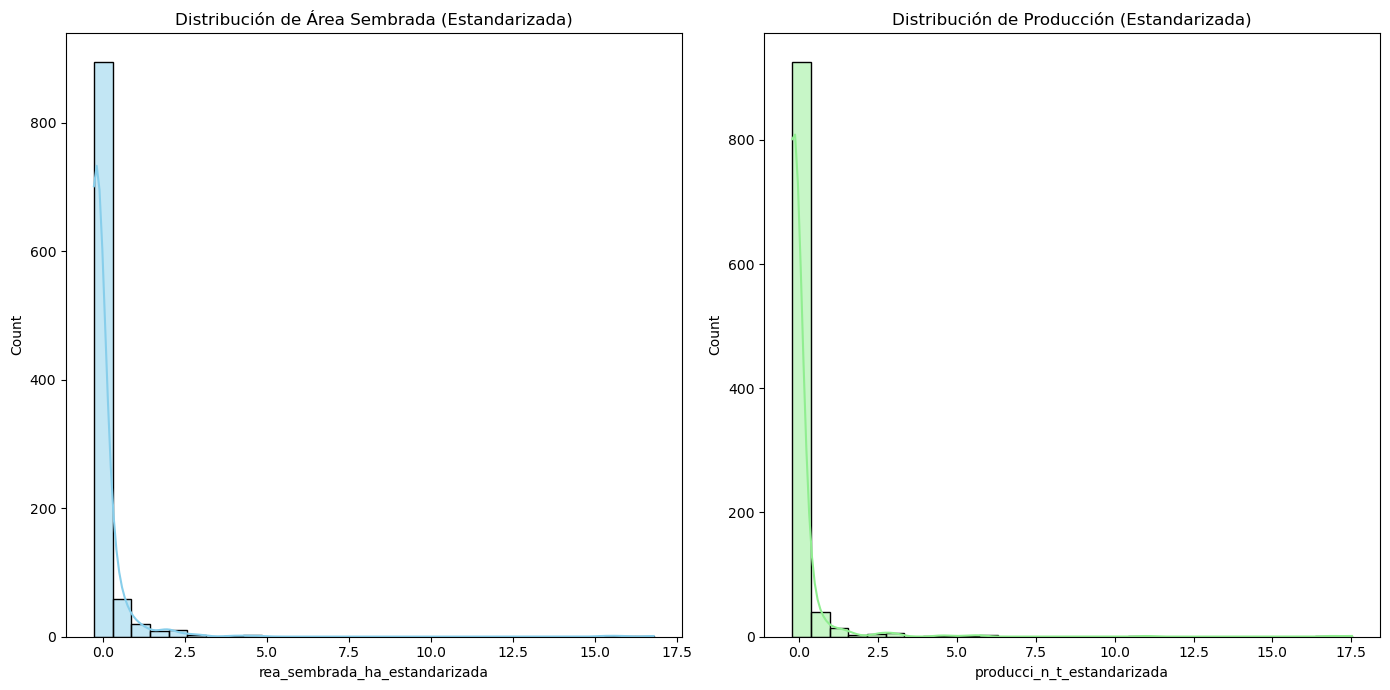

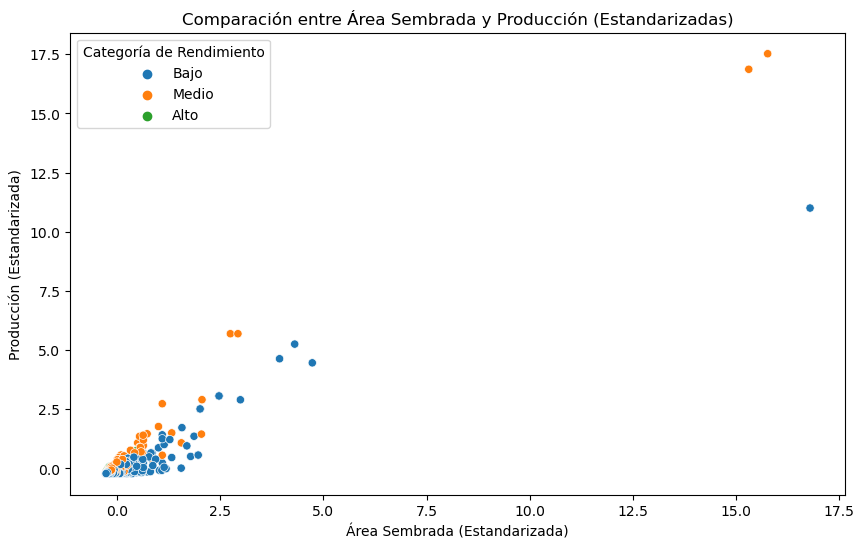

In [33]:
# Histograma de las variables estandarizadas
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(data['rea_sembrada_ha_estandarizada'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Área Sembrada (Estandarizada)')

plt.subplot(1, 2, 2)
sns.histplot(data['producci_n_t_estandarizada'], bins=30, kde=True, color='lightgreen')
plt.title('Distribución de Producción (Estandarizada)')

plt.tight_layout()
plt.show()

# Gráfico de dispersión entre las variables estandarizadas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rea_sembrada_ha_estandarizada', y='producci_n_t_estandarizada', data=data, hue='rendimiento_categoria')
plt.title('Comparación entre Área Sembrada y Producción (Estandarizadas)')
plt.xlabel('Área Sembrada (Estandarizada)')
plt.ylabel('Producción (Estandarizada)')
plt.legend(title='Categoría de Rendimiento')
plt.show()


# **Conclusiones**

* Al categorizar rendimiento_t_ha, estandarizar rea_sembrada_ha y producci_n_t, y visualizar sus distribuciones y relaciones, podemos hacer comparaciones más precisas y encontrar patrones significativos en los datos agrícolas. Esto es crucial para tomar decisiones informadas en la gestión y optimización de la producción agrícola.

Enfoque en Bolívar:

Bolívar podría servir como un caso de estudio para entender las prácticas agrícolas exitosas que podrían ser replicadas en otros departamentos con menor producción.
Optimización del Rendimiento:

Dado que el rendimiento (rendimiento_t_ha) muestra una correlación positiva con la producción total, aunque baja, sería beneficioso investigar las prácticas y condiciones que podrían mejorar el rendimiento por hectárea en los departamentos de baja producción.
Investigación sobre las Áreas Sembradas y Cosechadas:

La fuerte correlación entre las áreas sembradas, cosechadas y la producción sugiere que aumentar estas áreas podría ser una estrategia efectiva para aumentar la producción total. Sin embargo, es crucial considerar la sostenibilidad y los recursos disponibles.
Análisis Detallado de Departamentos con Producción Baja:

Realizar estudios detallados en los departamentos con baja producción para identificar las barreras y limitaciones que enfrentan. Esto podría incluir factores como condiciones climáticas, acceso a recursos, y técnicas agrícolas.
Políticas y Apoyo Gubernamental:

El gobierno y las agencias de desarrollo agrícola pueden considerar dirigir recursos y apoyo a los departamentos con baja producción para mejorar sus capacidades agrícolas y cerrar la brecha con Bolívar.


# **Referencias Bibliográficas**

* Idris, I. (2014). Python Data Analysis. Packt Publishing. (pp. 131-134). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=880858&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_131

* Samir Madhavan. (2015). Mastering Python for Data Science: Explore the World of Data Science Through Python and Learn How to Make Sense of Data. Packt Publishing. (pp. 11-25). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1058787&lang=es&site=ehost-live&ebv=EB&ppid=pp_11

* Thakur, A. (2016). Python: Real-World Data Science. Packt Publishing. (pp. 511 – 538). https://bibliotecavirtual.unad.edu.co/login?https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1250754&lang=es&site=ehost-live&ebv=EB&ppid=pp_511
